In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import s3fs
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [3]:
# Load the data
# csv file
url = "https://plasticpollution.s3.amazonaws.com/MLW_data_clean.csv"
MLW_data_df = pd.read_csv(url)
MLW_data_df

,BeachCountry,BeachName,BeachRegionalSea,BeachLength_m,BeachType,G1,G3,G4,G5,G7,...,G90,G91,G92,G93,G95,G96,G97,G98,G99,G100
0,Bulgaria,krapetz,Black Sea,5850,Sandy,NaN,NaN,1.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Bulgaria,krapetz,Black Sea,5850,Sandy,NaN,12.0,1.0,NaN,10.0,...,NaN,NaN,1.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN
2,Bulgaria,krapetz,Black Sea,5850,Sandy,NaN,27.0,7.0,NaN,3.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0
3,Bulgaria,krapetz,Black Sea,5850,Sandy,NaN,15.0,60.0,NaN,18.0,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN
4,Italy,San Mauro Cilento (SA),Unknown,100,NaN,NaN,5.0,6.0,NaN,13.0,...,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,Italy,"Spiaggia di Marina di Montemarciano, Ancona (AN)",Mediterranean Sea,100,NaN,NaN,1.0,23.0,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0
3166,France,"La Lagune, 33260 La Teste de Buch, FRANCE",North-east Atlantic Ocean,548,NaN,NaN,0.0,1.0,NaN,0.0,...,NaN,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3167,NaN,Bournemouth beach,North-east Atlantic Ocean,2302,Sandy,NaN,5.0,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
3168,Switzerland,cleanuptravels.com,NaN,22,Sandy,NaN,NaN,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,...,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
0,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2016,Cleanup,NaN,...,2.0,4.0,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN
1,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2015,Cleanup,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2015,Cleanup,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN,2.0,1.0
3,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2015,Cleanup,NaN,...,5.0,NaN,2.0,NaN,NaN,NaN,5.0,26.0,NaN,NaN
4,Legambiente Onlus,San Mauro Cilento (SA),IT,Unknown,100,NaN,NaN,2018,Monitoring,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,Legambiente Onlus,"Spiaggia di Marina di Montemarciano, Ancona (AN)",IT,Mediterranean Sea,100,NaN,NaN,2016,Monitoring,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3409,Surfrider Foundation Europe,"La Lagune, 33260 La Teste de Buch, FRANCE",FR,North-east Atlantic Ocean,548,NaN,NaN,2018,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3410,Surfers Against Sewage,Bournemouth beach,UK,North-east Atlantic Ocean,2302,Urban,Sandy,2015,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
3411,ocean-R-evolution.com,cleanuptravels.com,CH,NaN,22,Rural,Sandy,2017,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [30]:
df = pd.read_csv(r"C:\Users\mommy\Repositories\Dev\Analysis Projects\Ocean_Plastic_Pollution\Resources\MLW_Data.csv", encoding="iso-8859-1")
df.EventDate = pd.to_datetime(df.EventDate, format = "%Y%m%d").dt.year
# df.EventDate = pd.to_datetime(df.EventDate, format = "%Y%m%d")
# df.EventDate.unique()
df.groupby("BeachCountrycode").sum()

,BeachLength_m,EventDate,lon_x1,lat_y1,lon_x2,lat_y2,G1,G3,G4,G5,...,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
BeachCountrycode,,,,,,,,,,,,,,,,,,,,,
BA,1637,4032,36.728198,87.286578,36.716783,87.297943,0.0,47.0,18.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,374.0,0.0,0.0,0.0
BE,4824,8067,11.940544,205.033519,12.003559,205.051285,0.0,305.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0
BG,104150,149220,2067.357860,3174.276513,2067.522719,3173.951852,9.0,624.0,1035.0,99.0,...,41.0,20.0,206.0,16.0,0.0,0.0,534.0,66.0,32.0,1.0
CH,46778,1986953,8259.884139,46531.573294,8259.937420,46531.632201,3.0,551.0,1120.0,22.0,...,0.0,53.0,1860.0,0.0,0.0,0.0,12238.0,102.0,185.0,147.0
CV,400,8066,-91.608889,66.454444,-91.604889,66.454444,0.0,432.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0,0.0,0.0
CY,819,16150,262.795488,278.888744,262.792299,278.885353,3.0,91.0,73.0,98.0,...,0.0,2.0,8.0,0.0,1.0,1.0,91.0,28.0,9.0,1.0
DE,2705118,179519,773.679179,4272.050235,737.432900,4270.533263,0.0,1067.0,118.0,1.0,...,0.0,0.0,80.0,0.0,0.0,0.0,3413.0,1.0,30.0,11.0
DK,1029079,516281,2941.024963,14307.075924,2925.381576,14306.205942,453.0,1297.0,1701.0,106.0,...,22.0,45.0,1518.0,2.0,0.0,0.0,865.0,46.0,90.0,13945.0
DZ,182,4031,4.404900,73.233200,4.406900,73.233200,0.0,460.0,600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0


In [4]:
# Load the data 
# CSV File from S3 MLW_meta
url = "https://plasticpollution.s3.amazonaws.com/MLW_meta_clean.csv"
MLW_meta_df = pd.read_csv(url)
MLW_meta_df

,generalcode,category,generalname
0,G1,Plastic,"4/6-pack yokes, six-pack rings"
1,G3,Plastic,Shopping Bags incl. pieces
2,G4,Plastic,"Small plastic bags, e.g. freezer bags incl. pi..."
3,G5,Plastic,Plastic bags collective role; what remains fro...
4,G7,Plastic,Drink bottles <=0.5l
...,...,...,...
159,G210,Glass/ceramics,Other glass items
160,G211,unidentified,"Other medical items (swabs, bandaging, adhesiv..."
161,G213,Chemicals,Paraffin/Wax
162,G301,Cloth/textile,Disposable mask


In [5]:
# Load the data 
# CSV File from S3 Mismanagement
url = "https://plasticpollution.s3.amazonaws.com/Plastic_waste_mismanagement_clean.csv"
mismanagement_df = pd.read_csv(url)
mismanagement_df

,Country,Code,Year,PlasticWaste(metric tons)
0,Africa,NaN,2019,13690104
1,Albania,ALB,2019,69833
2,Algeria,DZA,2019,764578
3,Angola,AGO,2019,236946
4,Antigua and Barbuda,ATG,2019,627
...,...,...,...,...
166,Vietnam,VNM,2019,1112790
167,Western Sahara,ESH,2019,4114
168,World,OWID_WRL,2019,61773700
169,Yemen,YEM,2019,291737


In [6]:
mismanagement_df.rename(columns={'PlasticWaste(metric tons)' : 'Metric_Tons'}, inplace=True)
mismanagement_df

,Country,Code,Year,Metric_Tons
0,Africa,NaN,2019,13690104
1,Albania,ALB,2019,69833
2,Algeria,DZA,2019,764578
3,Angola,AGO,2019,236946
4,Antigua and Barbuda,ATG,2019,627
...,...,...,...,...
166,Vietnam,VNM,2019,1112790
167,Western Sahara,ESH,2019,4114
168,World,OWID_WRL,2019,61773700
169,Yemen,YEM,2019,291737


In [22]:
# Load the data 
# CSV File from S3
url = 'https://plasticpollution.s3.amazonaws.com/pbt_clean.csv'
pbt_df = pd.read_csv(url)
pbt_df

,COUNTRY NAME,YEAR,VALUE
0,Albania,2017,16481.0
1,Albania,2018,18094.0
2,Albania,2019,18500.0
3,Albania,2020,20157.0
4,Albania,2021,19828.0
...,...,...,...
695,Yemen,2017,30194.0
696,Yemen,2018,34205.0
697,Yemen,2019,35625.0
698,Yemen,2020,36032.0


In [23]:
# Rename columns 
pbt_df.rename(columns={'COUNTRY NAME' : 'Country', 'YEAR' : 'Year', 'VALUE' : 'Value'}, inplace=True)
pbt_df.Year.unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

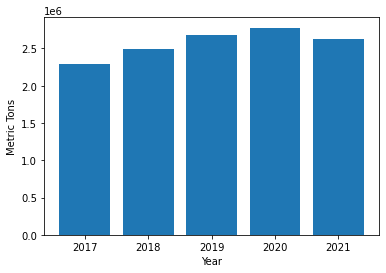

In [9]:
#Bar Graph for PBT
plt.bar(pbt_df.Year, pbt_df.Value)
plt.xlabel('Year')
plt.ylabel('Metric Tons')
plt.show()

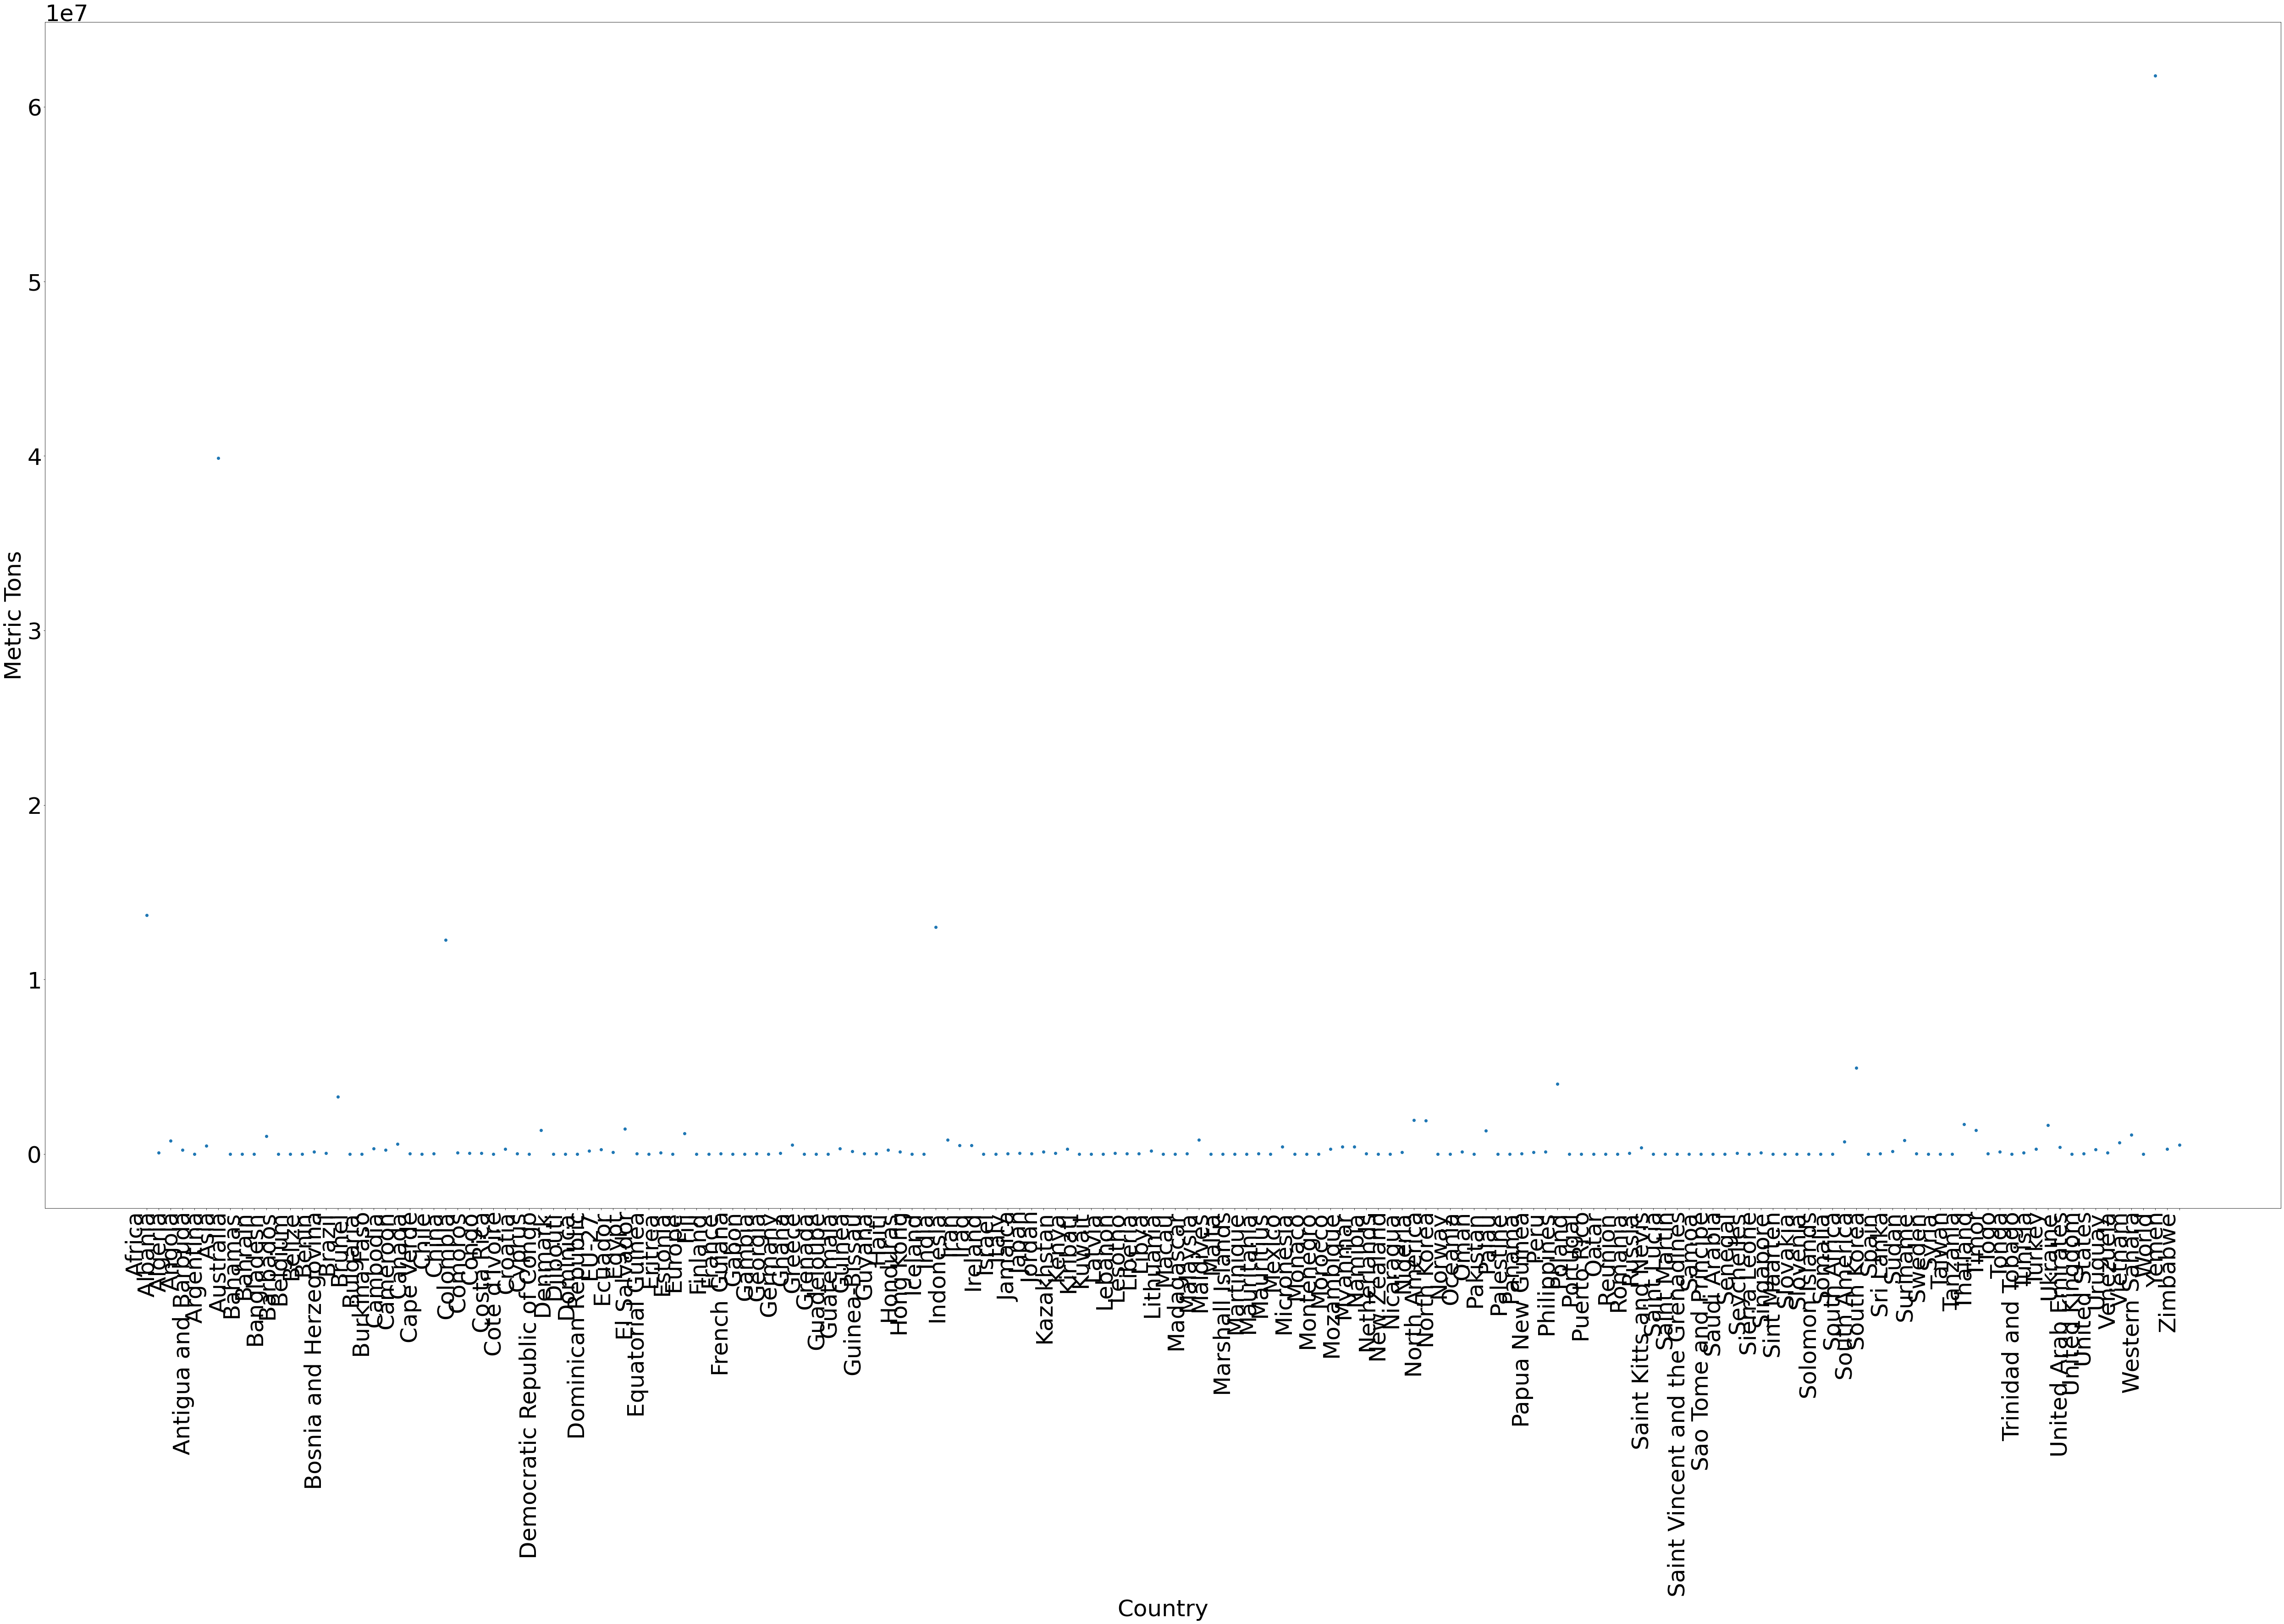

In [11]:
#Bar Graph for Mismanagement
plt.scatter(mismanagement_df.Country, mismanagement_df.Metric_Tons)
plt.xlabel('Country')
plt.ylabel('Metric Tons')
plt.xticks(rotation=90, ha='right')
plt.rcParams["figure.figsize"] = [70.50, 50.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["font.size"] = "50"
plt.show()